## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [5]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("BATCH_SIZE: %.0f" %(bs))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
            epochs=EPOCHS, 
            batch_size=bs, 
            validation_data=(x_test, y_test), 
            shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "BATCH_SIZE: %.0f" %(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

BATCH_SIZE: 2
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)       

25000/25000 [==============================] - 156s 6ms/step - loss: 2.2487 - accuracy: 0.1519 - val_loss: 75.1802 - val_accuracy: 0.1753
Epoch 47/50
25000/25000 [==============================] - 156s 6ms/step - loss: 2.2445 - accuracy: 0.1572 - val_loss: 73.2160 - val_accuracy: 0.1606
Epoch 48/50
25000/25000 [==============================] - 156s 6ms/step - loss: 2.2429 - accuracy: 0.1576 - val_loss: 21.0307 - val_accuracy: 0.1693
Epoch 49/50
25000/25000 [==============================] - 156s 6ms/step - loss: 2.2416 - accuracy: 0.1552 - val_loss: 169.5505 - val_accuracy: 0.1727
Epoch 50/50
25000/25000 [==============================] - 157s 6ms/step - loss: 2.2502 - accuracy: 0.1542 - val_loss: 40.6526 - val_accuracy: 0.1525
BATCH_SIZE: 16
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________

3125/3125 [==============================] - 21s 7ms/step - loss: 1.1365 - accuracy: 0.5970 - val_loss: 1.3805 - val_accuracy: 0.5274
Epoch 43/50
3125/3125 [==============================] - 21s 7ms/step - loss: 1.1284 - accuracy: 0.5990 - val_loss: 1.3435 - val_accuracy: 0.5377
Epoch 44/50
3125/3125 [==============================] - 21s 7ms/step - loss: 1.1229 - accuracy: 0.6008 - val_loss: 1.3979 - val_accuracy: 0.5199
Epoch 45/50
3125/3125 [==============================] - 21s 7ms/step - loss: 1.1132 - accuracy: 0.6021 - val_loss: 1.4002 - val_accuracy: 0.5250
Epoch 46/50
3125/3125 [==============================] - 21s 7ms/step - loss: 1.1179 - accuracy: 0.6049 - val_loss: 1.3782 - val_accuracy: 0.5261
Epoch 47/50
3125/3125 [==============================] - 21s 7ms/step - loss: 1.1036 - accuracy: 0.6079 - val_loss: 1.4285 - val_accuracy: 0.5103
Epoch 48/50
3125/3125 [==============================] - 21s 7ms/step - loss: 1.1026 - accuracy: 0.6115 - val_loss: 1.4058 - val_accurac

1563/1563 [==============================] - 11s 7ms/step - loss: 0.8808 - accuracy: 0.6866 - val_loss: 1.5360 - val_accuracy: 0.5080
Epoch 39/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8763 - accuracy: 0.6861 - val_loss: 1.6339 - val_accuracy: 0.4949
Epoch 40/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8733 - accuracy: 0.6896 - val_loss: 1.5110 - val_accuracy: 0.5204
Epoch 41/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8607 - accuracy: 0.6905 - val_loss: 1.5112 - val_accuracy: 0.5156
Epoch 42/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8506 - accuracy: 0.6951 - val_loss: 1.5558 - val_accuracy: 0.5127
Epoch 43/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8593 - accuracy: 0.6942 - val_loss: 1.5924 - val_accuracy: 0.5011
Epoch 44/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8505 - accuracy: 0.6960 - val_loss: 1.6858 - val_accurac

Epoch 35/50
391/391 [==============================] - 5s 12ms/step - loss: 0.4450 - accuracy: 0.8467 - val_loss: 2.1514 - val_accuracy: 0.4629
Epoch 36/50
391/391 [==============================] - 5s 12ms/step - loss: 0.4257 - accuracy: 0.8537 - val_loss: 2.1783 - val_accuracy: 0.4603
Epoch 37/50
391/391 [==============================] - 5s 12ms/step - loss: 0.4019 - accuracy: 0.8631 - val_loss: 2.1170 - val_accuracy: 0.4810
Epoch 38/50
391/391 [==============================] - 5s 12ms/step - loss: 0.3854 - accuracy: 0.8667 - val_loss: 2.1793 - val_accuracy: 0.4577
Epoch 39/50
391/391 [==============================] - 5s 12ms/step - loss: 0.3750 - accuracy: 0.8715 - val_loss: 2.2245 - val_accuracy: 0.4625
Epoch 40/50
391/391 [==============================] - 5s 12ms/step - loss: 0.3628 - accuracy: 0.8756 - val_loss: 2.4802 - val_accuracy: 0.4411
Epoch 41/50
391/391 [==============================] - 5s 12ms/step - loss: 0.3429 - accuracy: 0.8842 - val_loss: 2.2261 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 0.4468 - accuracy: 0.8564 - val_loss: 1.9160 - val_accuracy: 0.4747
Epoch 33/50
196/196 [==============================] - 3s 16ms/step - loss: 0.4267 - accuracy: 0.8626 - val_loss: 1.9198 - val_accuracy: 0.4777
Epoch 34/50
196/196 [==============================] - 3s 16ms/step - loss: 0.4042 - accuracy: 0.8724 - val_loss: 2.0799 - val_accuracy: 0.4550
Epoch 35/50
196/196 [==============================] - 3s 16ms/step - loss: 0.3833 - accuracy: 0.8788 - val_loss: 1.9029 - val_accuracy: 0.4836
Epoch 36/50
196/196 [==============================] - 3s 16ms/step - loss: 0.3669 - accuracy: 0.8862 - val_loss: 2.1459 - val_accuracy: 0.4736
Epoch 37/50
196/196 [==============================] - 3s 16ms/step - loss: 0.3583 - accuracy: 0.8882 - val_loss: 1.9703 - val_accuracy: 0.4805
Epoch 38/50
196/196 [==============================] - 3s 16ms/step - loss: 0.3322 - accuracy: 0.8972 - val_loss: 2.0845 - val_accuracy: 0.4788
Epoc

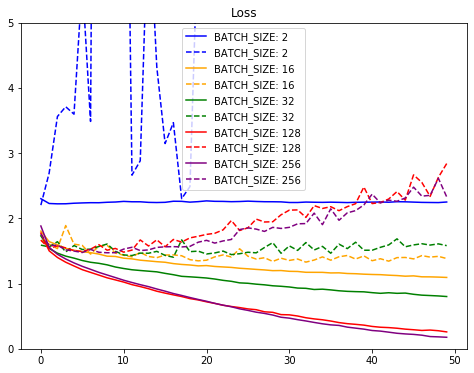

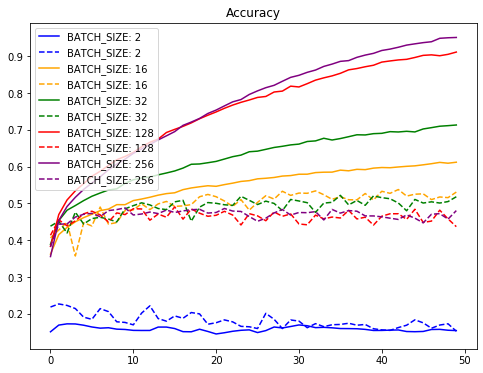

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["Blue", "Orange", "Green", "Red", "Purple", "Brown" ,"pink" , "gray"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()